# ITI105 Machine Learning Project

Team members:
* Lye Suh Jeng (7487427Y)
* Lee Li Neng (6203055B)
* Lim Chan Boon (9704541M)
---
Project Problem: 4 (a) as in suggested project:
* The success of the song can often been measured by whether the song is on the Hit Chart such as Billboard Hot 100. It is important for music labels to know what makes a song successful so that they can focus their budget on making songs that has the highest chance of being successful.
---
We want to solve the problem statement by using the follow steps:
1.   Load dataset
2.   Discover & visualize data to gain insights
3.   Split data into train and test datasets
4.   Scale training data for Feature Selection
5.   Feature scaling
6.   Train, fine tune and evaluate models
7.   Compare performance of models
8.   Deployment

# (1) Load dataset

In [46]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv('https://raw.githubusercontent.com/dy018/project105/main/song_data.csv')

# (2) Discover & visualize data to gain insights

In [47]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [49]:
# Drop song_name since it's not feature to determine song popularity
df.drop(['song_name'], axis=1, inplace=True)

print(">>> Display first 5 records:\n")
df.head()

>>> Display first 5 records:



,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [50]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

,0
audio_mode,2
time_signature,5
key,12
song_popularity,101
danceability,849
energy,1132
speechiness,1224
audio_valence,1246
liveness,1425
acousticness,3209


* audio_mode, time_signature and key most likely are categorical features. The rest are numeric features

In [51]:
# Study each columns in df
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [52]:
df['time_signature'].unique()

array([4, 3, 1, 5, 0])

## 2.2) Data visulisation using histogram

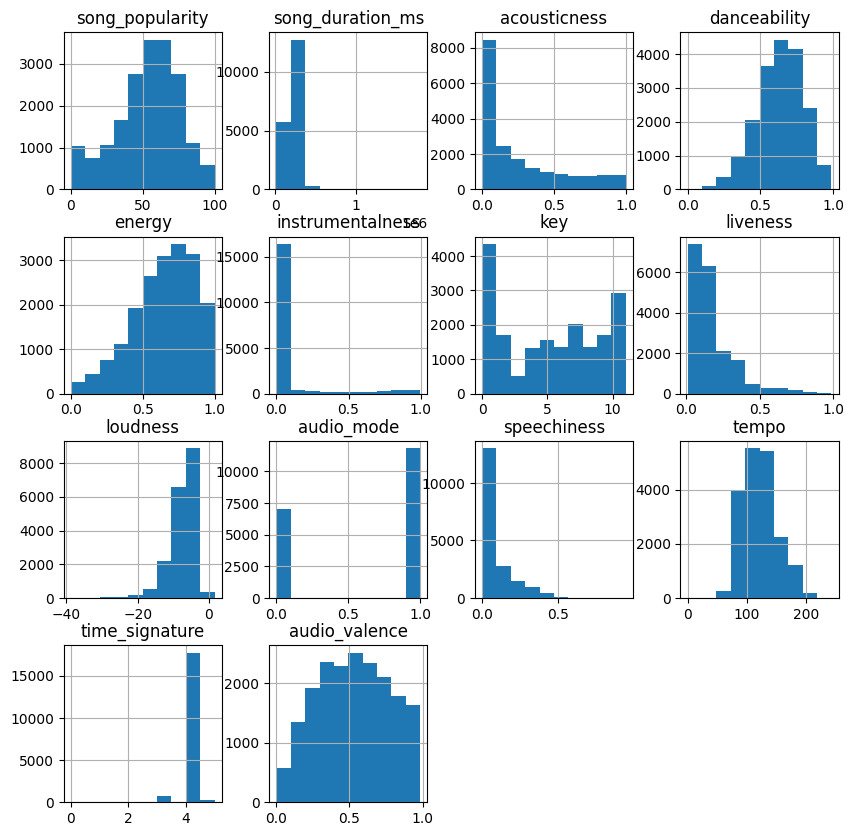

In [53]:
# Plot histograms for df to see data distribution

import matplotlib.pyplot as plt
df.hist(figsize=(10,10))
plt.show()


### Observations:
* Target = Song_popularity (Popularity score from 0 to 100 with 100 as the most popular song).
* Instrumentalness has small data variance and may not be good feature to determine song_popularity

In [54]:
df['song_popularity'].skew()

-0.501487468097605

* Skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.

In [55]:
df['song_popularity'].kurt()

-0.16910371120787238

* Kurtosis  is <3. This is call platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower
and broader.

## 2.3) Data visualisation using boxplot

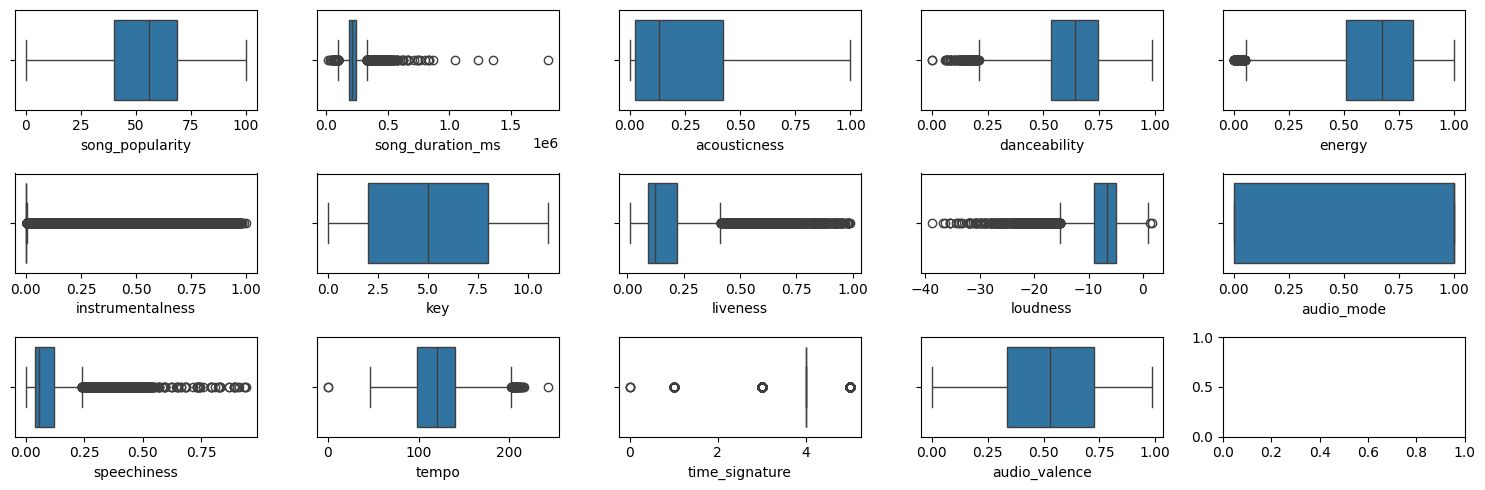

In [56]:
# Plot boxplot for numeric features
fig, axs = plt.subplots(3, 5, figsize=(15, 5))

for i, feature in enumerate(df.columns):
    sns.boxplot(x=df[feature], ax=axs[i // 5, i % 5])

# Adjust the layout so that the plots do not overlap
plt.tight_layout()

# Show the plot
plt.show()


### **Observation from boxplots:**
* song_duration_ms, danceability, energy, liveness, loudness and speechiness and tempo seem to have outliers.
* instrumentalness can't be plot using boxplot, highly suspect that it's not a feature that is useful to determine song_popularity.

## 2.4) Data visulisation using correlation matrix

In [57]:
corr_matrix = df.corr()
target_correlation = corr_matrix['song_popularity'].sort_values(ascending=False)
print(target_correlation)

song_popularity     1.000000
danceability        0.104290
loudness            0.099442
time_signature      0.034983
speechiness         0.021479
energy              0.001365
audio_mode         -0.004969
key                -0.013160
song_duration_ms   -0.018899
tempo              -0.022672
liveness           -0.038937
audio_valence      -0.052895
acousticness       -0.065181
instrumentalness   -0.130907
Name: song_popularity, dtype: float64


### Observation:
* features that has weak & positive correlation to song_popularity are (0.1 to 0.3): danceablity. loudness
* features that has weak negative correlation to song_popularity are: (-0.1 to -0.3) are: instrumentalness
* The rest of the features has negliglbe correlation (0.0 to 0.1 and 0.0 to -0.1)
* Top 3 numeric features that have higher correlation (either positive or negative) to song_popularity are: danceability, loudness and intrumentalness

                                         Correlation Matrix                                         


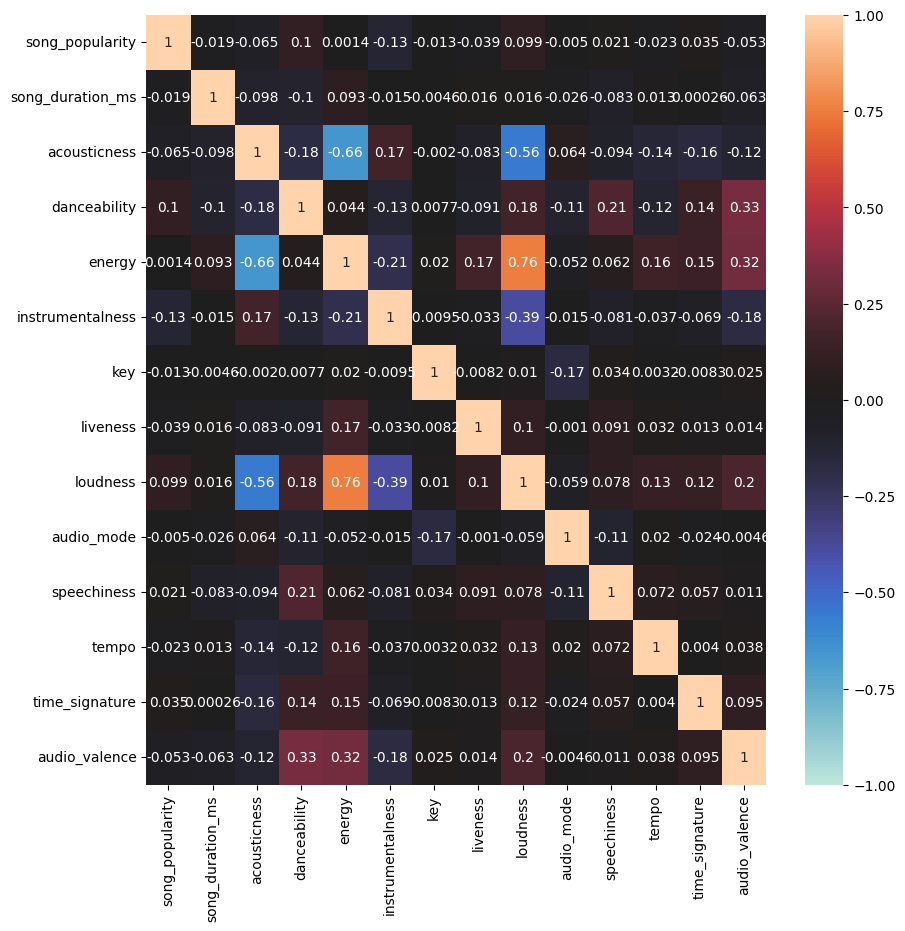

In [58]:
print('Correlation Matrix'.center(100))
plt.figure(figsize=[10,10])
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

### Obeservations:
* there are multi-colinearity between the following features:
** danceability and audio_valence (0.33)
** loudness and energy (0.76)

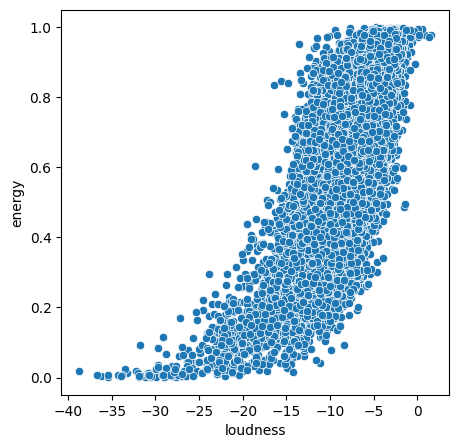

In [59]:
# plot scatterplot for loundnes vs energy to visualize their colinearlity.
plt.figure(figsize=[5,5])
sns.scatterplot(x=df['loudness'],y=df['energy'])

# Show the plot
plt.show()

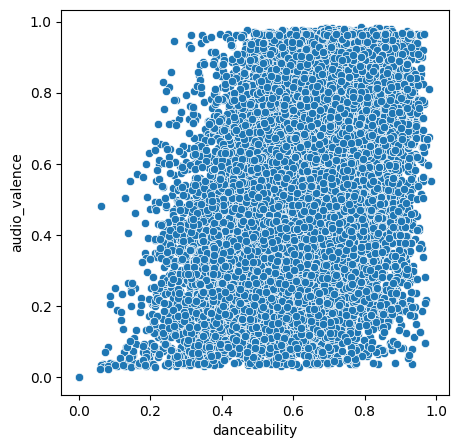

In [60]:
# plot scatterplot for danceability and audio_valence  to visualize their colinearlity.
plt.figure(figsize=[5,5])
sns.scatterplot(x=df['danceability'],y=df['audio_valence'])

# Show the plot
plt.show()

# 3) Split dataset to training and test data

In [61]:
# Y is target, X is features
Y = df['song_popularity']
X = df.drop(['song_popularity'], axis=1)

In [62]:
X_train0, X_test, y_train0, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=40)

print(">>> Size of trainig set: ", X_train0.shape)
print(">>> Size of testing set: ", X_test.shape)

>>> Size of trainig set:  (15068, 13)
>>> Size of testing set:  (3767, 13)


In [63]:
X_train0.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
12508,193816,0.001880,0.602,0.433,0.336000,4,0.1800,-13.092,0,0.0308,140.034,4,0.288
6546,235773,0.062200,0.839,0.832,0.000005,0,0.2820,-2.492,1,0.0531,92.004,4,0.529
6790,228613,0.002390,0.728,0.735,0.000280,0,0.0982,-6.247,1,0.0325,123.967,4,0.558
3628,230546,0.187000,0.801,0.410,0.025800,7,0.0993,-12.359,1,0.0322,125.133,4,0.719
18219,212438,0.000458,0.804,0.657,0.011900,0,0.1890,-6.021,1,0.0385,123.013,4,0.360


In [64]:
y_train0.head()

,song_popularity
12508,37
6546,83
6790,41
3628,60
18219,48


## (4) Feature engineerings

In [65]:
# conbine X_train0 and y_train0
train_df = pd.concat([y_train0, X_train0], axis=1)
train_df.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
12508,37,193816,0.001880,0.602,0.433,0.336000,4,0.1800,-13.092,0,0.0308,140.034,4,0.288
6546,83,235773,0.062200,0.839,0.832,0.000005,0,0.2820,-2.492,1,0.0531,92.004,4,0.529
6790,41,228613,0.002390,0.728,0.735,0.000280,0,0.0982,-6.247,1,0.0325,123.967,4,0.558
3628,60,230546,0.187000,0.801,0.410,0.025800,7,0.0993,-12.359,1,0.0322,125.133,4,0.719
18219,48,212438,0.000458,0.804,0.657,0.011900,0,0.1890,-6.021,1,0.0385,123.013,4,0.360


In [66]:
train_df.shape

(15068, 14)

## 4.1) Remove outliners

* The IQR method is used to remove outliners. This method identifies outliers by measuring the spread of the middle 50% of the data. Data points outside 1.5 times the IQR above the third quartile or below the first quartile are considered outliers.

In [67]:
#df1 is df without outliners
df1 = train_df.copy()

# remove outliners in Tempo, danceability, energy featuers that are outside 40% of IQR for both Q1 and Q3 ends respectively
features_w_outliners = ['tempo', 'danceability', 'energy']

for i in features_w_outliners:
  Q1 = df1[i].quantile(0.25)
  Q3 = df1[i].quantile(0.75)
  IQR = Q3 - Q1
  df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
  df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
  df1 = df1.reset_index(drop=True)

print(">>> df's shape after removing outliers:\n", df1.shape)
print(">>> Number of outliers that was removed\n", train_df.shape[0] - df1.shape[0])

>>> df's shape after removing outliers:
 (14789, 14)
>>> Number of outliers that was removed
 279


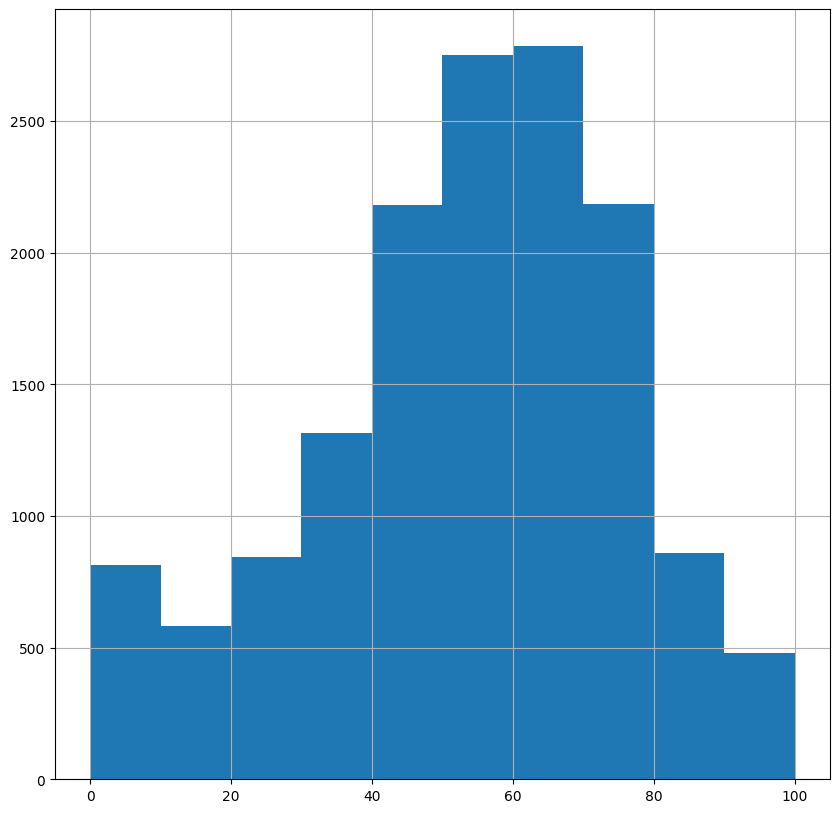

In [68]:
import matplotlib.pyplot as plt
df1['song_popularity'].hist(figsize=(10,10))
plt.show()

In [69]:
# Backup training df
df2_imbalanced = df1.copy()

## 4.2) Handle imbalanced datasets

In [70]:
Q1_df = df2_imbalanced[df2_imbalanced['song_popularity'] <= 25]
Q2_df = df2_imbalanced[(df2_imbalanced['song_popularity'] > 25) & (df2_imbalanced['song_popularity'] <= 50)]
Q3_df = df2_imbalanced[(df2_imbalanced['song_popularity'] > 51) & (df2_imbalanced['song_popularity'] <= 75)]
Q4_df = df2_imbalanced[(df2_imbalanced['song_popularity'] > 75) & (df2_imbalanced['song_popularity'] <= 100)]

Q1_length = len(Q1_df)
Q2_length = len(Q2_df)
Q3_length = len(Q3_df)
Q4_length = len(Q4_df)
print(">>> Number of records in Q1:", Q1_length)
print(">>> Number of records in Q2:", Q2_length)
print(">>> Number of records in Q3:", Q3_length)
print(">>> Number of records in Q4:", Q4_length)


>>> Number of records in Q1: 1897
>>> Number of records in Q2: 4091
>>> Number of records in Q3: 6509
>>> Number of records in Q4: 2036


In [71]:
# determine which df has highest number of data
df_lengths = {
    'Q1_df': Q1_df,
    'Q2_df': Q2_df,
    'Q3_df': Q3_df,
    'Q4_df': Q4_df
}

max_df_name = max(df_lengths, key=lambda k: len(df_lengths[k]))
max_df = df_lengths[max_df_name]
print(f">>> The DataFrame with the maximum number of records is: {max_df_name} with {len(max_df)} records")


>>> The DataFrame with the maximum number of records is: Q3_df with 6509 records


In [72]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Upsample 3 df to be the same length with max_df
def upsample_df(tmp_df, max_length):
  df_upsampled = resample(tmp_df,
                          replace=True,     # sample with replacement
                          n_samples=max_length,    # to match majority class
                          random_state=40)  # reproducible results
  return df_upsampled

Q1_df_upsampled = upsample_df(Q1_df, len(max_df))
Q2_df_upsampled = upsample_df(Q2_df, len(max_df))
Q4_df_upsampled = upsample_df(Q4_df, len(max_df))

In [73]:
print(">>> Number of records in Q1_df_upsampled:", len(Q1_df_upsampled))
print(">>> Number of records in Q2_df_upsampled:", len(Q2_df_upsampled))
print(">>> Number of records in Q4_df_upsampled:", len(Q4_df_upsampled))


>>> Number of records in Q1_df_upsampled: 6509
>>> Number of records in Q2_df_upsampled: 6509
>>> Number of records in Q4_df_upsampled: 6509


In [74]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([Q1_df_upsampled, Q2_df_upsampled, Q3_df, Q4_df_upsampled])

In [75]:
print(">>> New DF's shape after upsizing minority Quarters is:", df_upsampled.shape)

>>> New DF's shape after upsizing minority Quarters is: (26036, 14)


In [76]:
df_upsampled.head(10)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
10560,0,187727,0.745000,0.714,0.447,0.02940,1,0.2200,-15.467,1,0.0357,132.986,4,0.220
1592,14,238653,0.000018,0.550,0.917,0.21400,7,0.0333,-4.575,1,0.0378,109.552,3,0.245
53,21,161174,0.833000,0.411,0.176,0.87900,2,0.1330,-22.848,1,0.0559,170.450,4,0.956
1202,0,186026,0.001420,0.549,0.935,0.00000,2,0.2950,-3.350,1,0.0545,150.053,4,0.781
7943,6,202933,0.006490,0.753,0.719,0.00115,1,0.0947,-5.125,0,0.0347,99.948,4,0.579
11515,23,221049,0.977000,0.389,0.294,0.00393,8,0.1070,-5.429,1,0.0277,88.636,4,0.243
10354,14,210900,0.001200,0.380,0.873,0.43900,7,0.3390,-7.368,1,0.5940,140.005,4,0.377
13578,2,224754,0.062900,0.739,0.921,0.00010,7,0.4480,-3.882,1,0.0413,137.042,4,0.961
10136,22,301400,0.077100,0.573,0.645,0.01480,8,0.1050,-7.248,1,0.0277,120.765,4,0.478
14512,5,253793,0.006340,0.458,0.947,0.63000,3,0.4310,-2.650,0,0.0626,174.030,4,0.220


## 4.3) Split features into numeric and categorical features

In [77]:
y_train_upsample = df_upsampled['song_popularity']
X_train_upsample = df_upsampled.drop(['song_popularity'], axis=1)

In [78]:
# song_popularity is target. The rest of columns are features
# Get list of features from df
features = X_train_upsample.columns.tolist()

# put features into 2 types: categorical features and numeric features
category_features = ['audio_mode', 'time_signature', 'key']
numeric_features = [feature for feature in features if feature not in category_features]
print(">>> Categorical features are:", category_features)
print(">>> Numeric features are:", numeric_features)

>>> Categorical features are: ['audio_mode', 'time_signature', 'key']
>>> Numeric features are: ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']


In [79]:
# split target, numeric and categorical features
X_train_numeric = X_train_upsample[numeric_features]
X_train_category = X_train_upsample[category_features]

In [80]:
print(y_train_upsample.shape)
print(X_train_numeric.shape)
print(X_train_category.shape)

(26036,)
(26036, 10)
(26036, 3)


In [81]:
for feature in category_features:
    dummies = pd.get_dummies(X_train_category[feature], prefix=feature)
    X_train_category = pd.concat([X_train_category, dummies], axis=1)
    X_train_category.drop(feature, axis=1, inplace=True)

print(">>> X_train_category's shape using dummy encoding:", X_train_category.shape)
print(">>> Columns in new df_cotegory:\n", X_train_category.columns)
print(">>> First 5 records in X_train_category:\n")
X_train_category.head()

>>> X_train_category's shape using dummy encoding: (26036, 19)
>>> Columns in new df_cotegory:
 Index(['audio_mode_0', 'audio_mode_1', 'time_signature_0', 'time_signature_1',
       'time_signature_3', 'time_signature_4', 'time_signature_5', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11'],
      dtype='object')
>>> First 5 records in X_train_category:



,audio_mode_0,audio_mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
10560,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
1592,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
53,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
1202,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
7943,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False


In [82]:
print(">>> X_train_numeric's shape is:", X_train_numeric.shape)
print(">>> Columns in new df:\n", X_train_numeric.columns)
print(">>> First 5 records in new X_train_numeric:\n")
X_train_numeric.head()

>>> X_train_numeric's shape is: (26036, 10)
>>> Columns in new df:
 Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'audio_valence'],
      dtype='object')
>>> First 5 records in new X_train_numeric:



,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
10560,187727,0.745000,0.714,0.447,0.02940,0.2200,-15.467,0.0357,132.986,0.220
1592,238653,0.000018,0.550,0.917,0.21400,0.0333,-4.575,0.0378,109.552,0.245
53,161174,0.833000,0.411,0.176,0.87900,0.1330,-22.848,0.0559,170.450,0.956
1202,186026,0.001420,0.549,0.935,0.00000,0.2950,-3.350,0.0545,150.053,0.781
7943,202933,0.006490,0.753,0.719,0.00115,0.0947,-5.125,0.0347,99.948,0.579


In [83]:
# Combine numeric and categorical features before scaling
# X_train_29 = X_train upsampled with 29 features
X_train_29 = pd.concat([X_train_numeric, X_train_category], axis=1)

In [84]:
print(len(X_train_29.columns))
print(X_train_29.columns)

29
Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'audio_valence', 'audio_mode_0', 'audio_mode_1', 'time_signature_0',
       'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11'],
      dtype='object')


In [85]:
X_train_29.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26036 entries, 10560 to 6482
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  26036 non-null  int64  
 1   acousticness      26036 non-null  float64
 2   danceability      26036 non-null  float64
 3   energy            26036 non-null  float64
 4   instrumentalness  26036 non-null  float64
 5   liveness          26036 non-null  float64
 6   loudness          26036 non-null  float64
 7   speechiness       26036 non-null  float64
 8   tempo             26036 non-null  float64
 9   audio_valence     26036 non-null  float64
 10  audio_mode_0      26036 non-null  bool   
 11  audio_mode_1      26036 non-null  bool   
 12  time_signature_0  26036 non-null  bool   
 13  time_signature_1  26036 non-null  bool   
 14  time_signature_3  26036 non-null  bool   
 15  time_signature_4  26036 non-null  bool   
 16  time_signature_5  26036 non-null  bool   


## 4.4) Scale Train data before feature selection

In [86]:
# Scale training data
min_max_scaler = MinMaxScaler()

# Fit the scaler to the training data
min_max_scaler.fit(X_train_29)

MinMaxScaler()

In [87]:
#Transform training datasets
Xd = min_max_scaler.transform(X_train_29)

In [88]:
print(Xd)

[[1.33783582e-01 7.47991710e-01 6.52343750e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.75959022e-01 1.75502188e-05 4.38802083e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.11793156e-01 8.36345214e-01 2.57812500e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.56495346e-01 2.67067522e-01 7.86458333e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.62034982e-01 5.29106767e-02 6.06770833e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.25737900e-01 1.65661796e-01 2.21354167e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


# 4) Scale training data for Feature Selection

## 4.1) Feature selection using Lasso Regression

In [89]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Step 1: Use Lasso Regression for Feature Selection
lasso = Lasso()

# Define the hyperparameter grid
param_grid = {'alpha': [0.008, 0.01, 0.08, 0.1, 0.12]}

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(Xd, y_train_upsample)

# Get the best Lasso model
best_lasso = grid_search.best_estimator_

print(f">>> Best Hyperparameters: {grid_search.best_params_}")
print(f">>> Best Score: {grid_search.best_score_}")
print(">>> Lasso's coef are:", best_lasso.coef_)

# Get the indices of the selected features
selected_features = np.where(best_lasso.coef_ != 0)[0]
print(">>> Selected features:", selected_features)
print(f">>> Number of selected features:", len(selected_features))

>>> Best Hyperparameters: {'alpha': 0.008}
>>> Best Score: -1050.2452507435682
>>> Lasso's coef are: [ -9.63887346  -3.81406329  21.06824113 -17.10395387 -18.24287583
  -2.27468689  48.36081415  -0.77661328   0.3541166  -13.74790312
  -0.87290435   0.           0.          -7.82727082  -2.94718044
   0.           1.63105266   1.38715232   2.62651869  -1.0903901
  -1.32482249  -0.32175736   0.51844664   1.9945622   -2.07383154
  -1.05465958  -1.59575939   1.49607765   1.45545948]
>>> Selected features: [ 0  1  2  3  4  5  6  7  8  9 10 13 14 16 17 18 19 20 21 22 23 24 25 26
 27 28]
>>> Number of selected features: 26


In [90]:
features_list = selected_features.tolist()

selected_columns = X_train_29.columns[features_list]
selected_columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'audio_valence', 'audio_mode_0', 'time_signature_1', 'time_signature_3',
       'time_signature_5', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11'],
      dtype='object')

In [91]:
out_of_selected_columns = [col for col in X_train_29.columns if col not in selected_columns]
out_of_selected_columns

['audio_mode_1', 'time_signature_0', 'time_signature_4']

**Observation**:
* 'audio_mode_1', 'time_signature_0', 'time_signature_4' should be removed

## 4.2) Feature selection using variance_inflation_factor

In [92]:
# Convert the result back to a DataFrame for better visualization
all_features = X_train_29.columns
df_encoded = pd.DataFrame(Xd, columns=all_features)

In [93]:
!pip install statsmodels

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

DROP=[];

for i in range(len(df_encoded.columns)):
    vif = pd.DataFrame()
    vif['Features'] = df_encoded.columns
    vif['VIF'] = [variance_inflation_factor(df_encoded.values, i) for i in range(df_encoded.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)

vif

,Features,VIF
0,time_signature_3,inf
1,time_signature_4,inf
2,key_10,inf
3,key_9,inf
4,key_8,inf
5,key_7,inf
6,key_6,inf
7,key_5,inf
8,key_4,inf
9,key_3,inf


In [95]:
# VIF ≥ 5: Indicates high correlation. Use threshold of 5
tobe_drop = vif[(vif['VIF'] > 5)]['Features'].tolist()
print(tobe_drop)

['time_signature_3', 'time_signature_4', 'key_10', 'key_9', 'key_8', 'key_7', 'key_6', 'key_5', 'key_4', 'key_3', 'key_2', 'key_1', 'key_0', 'time_signature_5', 'key_11', 'time_signature_1', 'time_signature_0', 'audio_mode_1', 'audio_mode_0']


**Observations:**
* Base on VIF, audio_mode, key and time_signature shall be removed.

## 4.3) Feature selection using PCA

- use n_components = 95%

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components =0.95)
X_pca = pca.fit_transform(Xd)
X_pca.shape

(26036, 18)

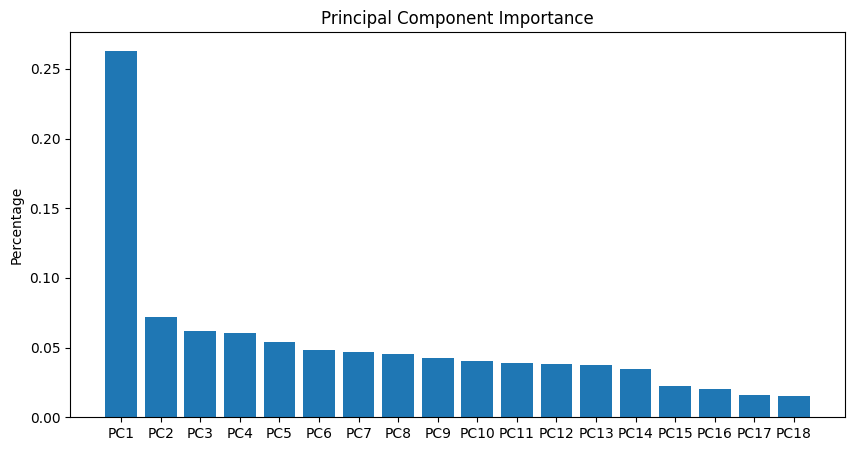

In [97]:
Cols = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17', 'PC18']
rData = pca.explained_variance_ratio_

plt.figure(figsize=(10,5))
plt.bar(Cols, rData)
plt.title('Principal Component Importance')
plt.ylabel('Percentage')
plt.show()

**Observations from PCA"**
* PCA is not a good way to be used to reduce features in this case. We need 18 features if use PCA.

## 4.4) Final Feature selection

In [98]:
# drop 'audio_mode', 'key', 'time_signature' from both training and test data
X_train3 = X_train_upsample.drop(['audio_mode', 'key', 'time_signature'], axis=1)
print(X_train3.shape)
X_train3.head()
y_train3 = y_train_upsample.copy()

(26036, 10)


In [99]:
y_train3.head()

,song_popularity
10560,0
1592,14
53,21
1202,0
7943,6


In [100]:
y_train3.shape


(26036,)

In [101]:
X_test= X_test.drop(['audio_mode', 'key', 'time_signature'], axis=1)
print(X_test.shape)
X_test.head()

(3767, 10)


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
16990,223413,0.530000,0.440,0.591,0.000010,0.1710,-7.859,0.0369,121.398,0.373
4028,200400,0.000156,0.591,0.939,0.011100,0.0882,-4.911,0.0533,150.249,0.856
6897,168440,0.628000,0.697,0.656,0.000024,0.4220,-5.380,0.0424,125.624,0.890
9817,215453,0.823000,0.609,0.622,0.000000,0.0999,-4.933,0.1030,135.119,0.574
17869,205933,0.021600,0.554,0.878,0.000006,0.3620,-4.271,0.1340,126.045,0.682


# 5) Scale test and training data before training models

In [102]:
# scale train data
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train3)

MinMaxScaler()

In [103]:
import pickle

# Save the pipeline to a pickle file
with open('mm_scaler1.pkl', 'wb') as file:
    pickle.dump(mm_scaler, file)

In [104]:
# transform train data & test data
X_train = mm_scaler.transform(X_train3)
X_test = mm_scaler.transform(X_test)

In [105]:
#rename y_train3 to y_train
y_train = y_train3.copy()

# 6.  Train, fine tune, and evaluate model's performance

## Model Evaluation Functions

In [106]:
# calculates r2_score
def cal_r2(y_true, y_pred):
  r2 = r2_score(y_true, y_pred)
  return r2

# Calculates adjusted_r2
def cal_adj_r2(x_df, r2):
  number_variables = x_df[1] - 1
  adjusted_r2 = 1 - ((1-r2) * (x_df[0]-1)) / (x_df[0] - number_variables -1)
  return adjusted_r2

def cal_mse(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  return mse

def cal_performance(x_train_shape, x_test_shape, y_train, y_train_pred, y_test, y_test_pred):
  r2_train = cal_r2(y_train, y_train_pred)
  r2_test = cal_r2(y_test, y_test_pred)
  adj_r2_train = cal_adj_r2(x_train_shape, r2_train)
  adj_r2_test = cal_adj_r2(x_test_shape, r2_test)
  mse_train = cal_mse(y_train, y_train_pred)
  mse_test = cal_mse(y_test, y_test_pred)

  performance_dict = {
    'r2_train': r2_train,
    'r2_test': r2_test,
    'adj_r2_train': adj_r2_train,
    'adj_r2_test': adj_r2_test,
    'mse_train': mse_train,
    'mse_test': mse_test
    }
  return performance_dict

## 6a) Polynomial Regression (PR)

In [107]:
# specify degree of 3 for polynomial regression model
# include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_train_features = poly.fit_transform(X_train)
poly_test_features = poly.fit_transform(X_test)

# Create LinearRegression
pr = LinearRegression()

# train the model
pr.fit(poly_train_features, y_train)

pr_pred_train = pr.predict(poly_train_features)
pr_pred_test = pr.predict(poly_test_features)

In [108]:
pr_performance = cal_performance(X_train.shape, X_test.shape, y_train, pr_pred_train, y_test, pr_pred_test)
print(pr_performance)

{'r2_train': 0.18369459084098538, 'r2_test': -0.1880345863613584, 'adj_r2_train': 0.18341230586894086, 'adj_r2_test': -0.19088055689030492, 'mse_train': 628.2173622697703, 'mse_test': 568.0666745041505}


## 6b) Multiple Linear Regression (mlr)

In [109]:
mlr = LinearRegression()
mlr_param = {'copy_X': [True, False], 'fit_intercept': [True, False], 'n_jobs': [1,5,10,15,None], 'positive': [True, False]}

random_search = RandomizedSearchCV(mlr, mlr_param, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search.best_score_}")

# Train the Elastic Net model with the best parameters
best_mlr = random_search.best_estimator_
best_mlr.fit(X_train, y_train)

# Predict on the test set
mlr_pred_train = best_mlr.predict(X_train)
mlr_pred_test = best_mlr.predict(X_test)

Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': False, 'copy_X': True}
Best Score: -14.10004061454984


In [110]:
# Evalute performance
mlr_performance = cal_performance(X_train.shape, X_test.shape, y_train, mlr_pred_train, y_test, mlr_pred_test)
print(mlr_performance)

{'r2_train': 0.0862277387164525, 'r2_test': -0.07982652966803117, 'adj_r2_train': 0.0859117489234934, 'adj_r2_test': -0.08241328472978582, 'mse_train': 703.2265047590911, 'mse_test': 516.3262692785755}


## 6c) Elastic Net Regression (enr)

In [111]:
# Create an ElasticNet regression model instance
# l1_ratio corresponds to the mix of L1 and L2 regularization
# alpha corresponds to the strength of the regularization
enr = ElasticNet()

# Define the hyperparameters grid to search
param_grid = {
    'alpha': [0.0005, 0.001, 0.005, 0.1],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0],
    'fit_intercept': [True, False],
    'max_iter': [200, 300]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(enr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)

# Train the Elastic Net model with the best parameters
best_elastic_net = grid_search.best_estimator_
best_elastic_net.fit(X_train, y_train)

# Predict on the test set
enr_pred_train = best_elastic_net.predict(X_train)
enr_pred_test = best_elastic_net.predict(X_test)

Best parameters found:  {'alpha': 0.005, 'fit_intercept': False, 'l1_ratio': 0.9, 'max_iter': 300}
Best cross-validation score (negative MSE):  -1048.1163181669212


In [112]:
# Evaluate the model
enr_performance = cal_performance(X_train.shape, X_test.shape, y_train, enr_pred_train, y_test, enr_pred_test)
print(enr_performance)

{'r2_train': 0.08598942449800084, 'r2_test': -0.07823928039864714, 'adj_r2_train': 0.08567335229406947, 'adj_r2_test': -0.08082223315978321, 'mse_train': 703.4099080883198, 'mse_test': 515.5673154363059}


## 6d) Adaboost (ada)

In [113]:
# Define the AdaBoost Regressor model
adaboost = AdaBoostRegressor() # base estimator is DecisionTreeRegressor

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'loss': ['linear', 'square', 'exponential']
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)

# Train the AdaBoost Regressor model with the best parameters
best_adaboost = grid_search.best_estimator_
best_adaboost.fit(X_train, y_train)

# Predict on the test data
ada_pred_train = best_adaboost.predict(X_train)
ada_pred_test = best_adaboost.predict(X_test)

Best parameters found:  {'learning_rate': 0.05, 'loss': 'square', 'n_estimators': 300}
Best cross-validation score (negative MSE):  -813.2623272935513


In [114]:
# Evaluate the model
ada_performance = cal_performance(X_train.shape, X_test.shape, y_train, ada_pred_train, y_test, ada_pred_test)
print(ada_performance)

{'r2_train': 0.0730457929210826, 'r2_test': -0.06768204977519687, 'adj_r2_train': 0.0727252447053095, 'adj_r2_test': -0.0702397123911076, 'mse_train': 713.3711480803719, 'mse_test': 510.5193050828324}


## 6e) Gradient Boosting Regressor (gbr)

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 1],
    'max_depth': [3,5,7,9,11,13,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(gbr, param_distributions=param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)


# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score (negative MSE): ", random_search.best_score_)

# Train the AdaBoost Regressor model with the best parameters
best_gbr = random_search.best_estimator_
best_gbr.fit(X_train, y_train)

# Predict on the test data
gbr_pred_train = best_gbr.predict(X_train)
gbr_pred_test = best_gbr.predict(X_test)


Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 13, 'learning_rate': 0.05}
Best cross-validation score (negative MSE):  -348.39125056614023


In [116]:
# Evaluate the model
gbr_performance = cal_performance(X_train.shape, X_test.shape, y_train, gbr_pred_train, y_test, gbr_pred_test)
print(gbr_performance)

{'r2_train': 0.9761310835580804, 'r2_test': 0.31936756311143355, 'adj_r2_train': 0.9761228294949137, 'adj_r2_test': 0.31773708881492124, 'mse_train': 18.36918824638009, 'mse_test': 325.44894687547446}


## 6f) RBF SVC (RBF)

In [117]:
# Define the SVR model with RBF kernel
svr = SVR(kernel='rbf')

# Define the hyperparameters grid to search
param_grid = {
    'C': [0.1, 1, 10, 100, 200],
    'gamma': [1e-1, 1, 2, 3, 4, 5],
    'epsilon': [0.01, 0.1, 1, 10]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)

# Train the SVR model with the best parameters
best_svr = grid_search.best_estimator_
best_svr.fit(X_train, y_train)

# Predict on the test set
rbf_pred_train = best_svr.predict(X_train)
rbf_pred_test = best_svr.predict(X_test)

Best parameters found:  {'C': 200, 'epsilon': 10, 'gamma': 5}
Best cross-validation score (negative MSE):  -846.6018544446868


In [118]:
# Evaluate the model
rbf_performance = cal_performance(X_train.shape, X_test.shape, y_train, rbf_pred_train, y_test, rbf_pred_test)
print(rbf_performance)

{'r2_train': 0.4892818240612681, 'r2_test': -0.05825102323574449, 'adj_r2_train': 0.4891052136108166, 'adj_r2_test': -0.060786093560237786, 'mse_train': 393.04165052881484, 'mse_test': 506.0097967360799}


## 6g) Random Forest Regressor

In [119]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest Regressor
rf = RandomForestRegressor(random_state=40)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [120]:
# Evaluate the model
rf_performance = cal_performance(X_train.shape, X_test.shape, y_train, rf_pred_train, y_test, rf_pred_test)
print(rf_performance)

{'r2_train': 0.9755912505886914, 'r2_test': 0.383862080102331, 'adj_r2_train': 0.9755828098469447, 'adj_r2_test': 0.3823861042495019, 'mse_train': 18.784636239607494, 'mse_test': 294.61046270054754}


In [121]:
# convert dictionary to dataframe
rf_df = pd.DataFrame.from_dict(rf_performance, orient='index', columns=['RF'])

print(">>> Model performance:\n")
rf_df

>>> Model performance:



,RF
r2_train,0.975591
r2_test,0.383862
adj_r2_train,0.975583
adj_r2_test,0.382386
mse_train,18.784636
mse_test,294.610463


## Compare performance

In [122]:
# convert dictionary to dataframe
pr_df  = pd.DataFrame.from_dict(pr_performance, orient='index', columns=['PR'])
mlr_df = pd.DataFrame.from_dict(mlr_performance, orient='index', columns=['MLR'])
enr_df = pd.DataFrame.from_dict(enr_performance, orient='index', columns=['ENR'])
ada_df = pd.DataFrame.from_dict(ada_performance, orient='index', columns=['ADA'])
gbr_df = pd.DataFrame.from_dict(gbr_performance, orient='index', columns=['GBR'])
rbf_df = pd.DataFrame.from_dict(rbf_performance, orient='index', columns=['RBF'])
rf_df = pd.DataFrame.from_dict(rf_performance, orient='index', columns=['RF'])

df_performance = pd.concat([pr_df, mlr_df, enr_df, ada_df, gbr_df, rbf_df, rf_df], axis=1)
print(">>> Comparision of model performance:\n")
df_performance

>>> Comparision of model performance:



,PR,MLR,ENR,ADA,GBR,RBF,RF
r2_train,0.183695,0.086228,0.085989,0.073046,0.976131,0.489282,0.975591
r2_test,-0.188035,-0.079827,-0.078239,-0.067682,0.319368,-0.058251,0.383862
adj_r2_train,0.183412,0.085912,0.085673,0.072725,0.976123,0.489105,0.975583
adj_r2_test,-0.190881,-0.082413,-0.080822,-0.070240,0.317737,-0.060786,0.382386
mse_train,628.217362,703.226505,703.409908,713.371148,18.369188,393.041651,18.784636
mse_test,568.066675,516.326269,515.567315,510.519305,325.448947,506.009797,294.610463


**Observations:**
* RF (Random Forrest) and GBR are the best models. RF is selected as it has the highest adjusted R2 test.

In [123]:
# dump models

import pickle

# Save the trained model to a pickle file
with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

# Save the trained model to a pickle file
with open('best_svr.pkl', 'wb') as f:
    pickle.dump(best_svr, f)

In [124]:
# Save the trained model to a pickle file
with open('best_gbr.pkl', 'wb') as f:
    pickle.dump(best_gbr, f)

# 7) Validate using test data on Best Model

## 7a) Manually check some test data

### Manually check test data using Random Forest Model (RF)

In [125]:
print(y_test[0:20].values)
print(rf_pred_test[:20])

[ 7 58 16 33 30 30 39 72 81 51 59 63 59 51 49 38 41 52 31 49]
[47.83618681 48.89678102 46.71600577 46.82401786 35.5386131  43.96030357
 52.13801984 45.70391793 81.         41.62446104 62.03893056 59.77923557
 53.37266865 60.8488373  42.30585119 53.41777778 48.84372222 44.87547421
 38.19218254 47.32367857]


**Observation:**
* At one glace, the predicted song_popularity score is close to real song_popularity score.

## 7b) Validation using histogram


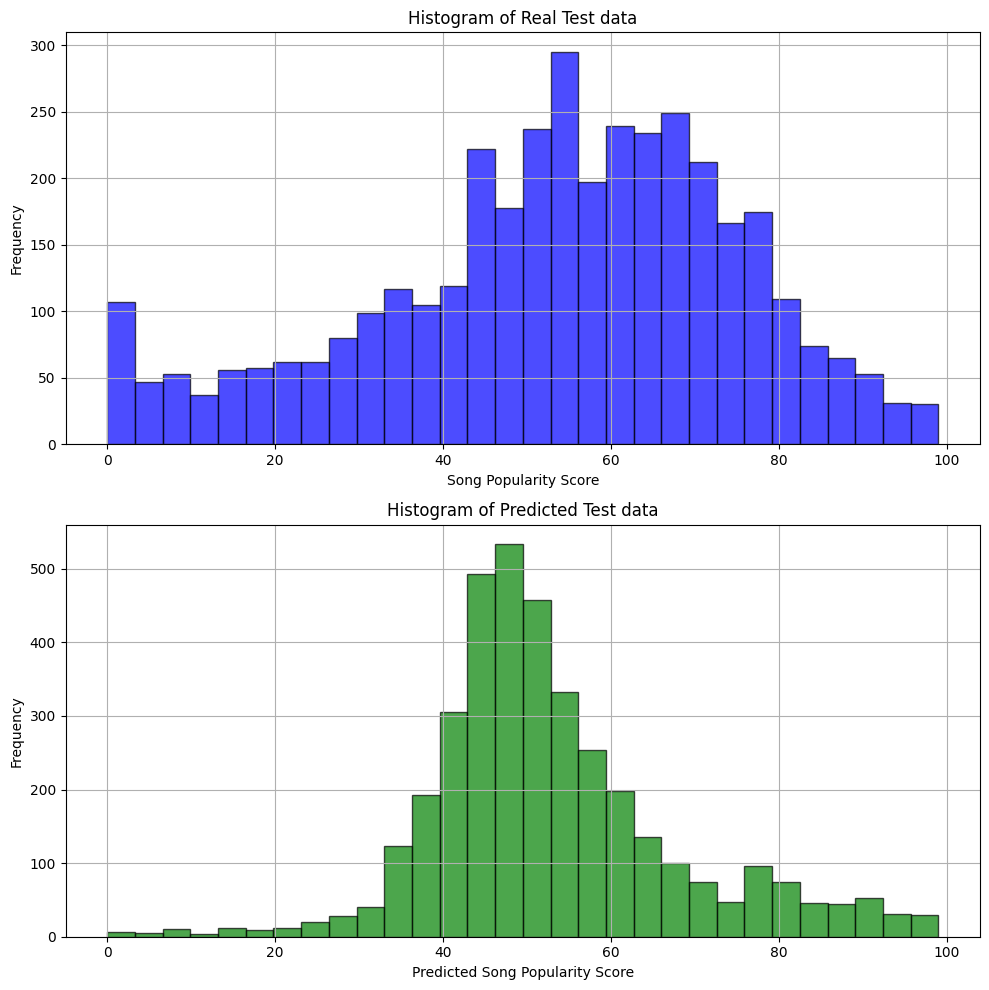

In [126]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot the first histogram on the first subplot
ax1.hist(y_test, bins=30, color='blue', alpha=0.7, edgecolor='black')
ax1.set_title('Histogram of Real Test data')
ax1.set_xlabel('Song Popularity Score')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# Plot the second histogram on the second subplot
ax2.hist(rf_pred_test, bins=30, color='green', alpha=0.7, edgecolor='black')
ax2.set_title('Histogram of Predicted Test data')
ax2.set_xlabel('Predicted Song Popularity Score')
ax2.set_ylabel('Frequency')
ax2.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


**Observations**:
- Many prediction happen in roughly 50% song_popularity score.

## 7c) Validation using Residual Plot for 2 best models

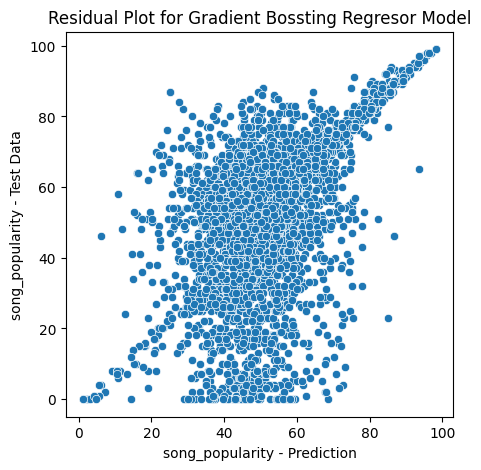

In [127]:
# plot scatterplot for Residual Plot for GBR(Gradient Boosting Regressor) Model
plt.figure(figsize=[5,5])
sns.scatterplot(x=gbr_pred_test ,y=y_test)

# Show the plot
plt.title("Residual Plot for Gradient Bossting Regresor Model")
plt.xlabel('song_popularity - Prediction')
plt.ylabel('song_popularity - Test Data')
plt.show()

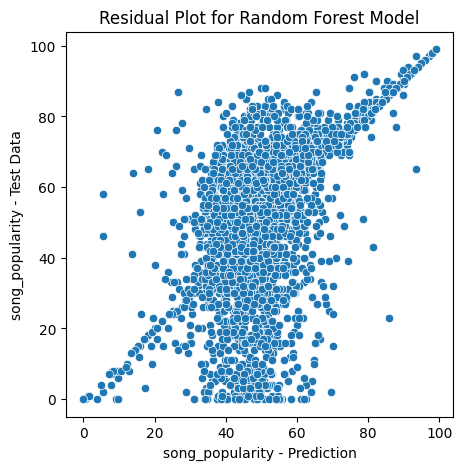

In [128]:
# plot scatterplot for Residual Plot for Random Forest Model
plt.figure(figsize=[5,5])
sns.scatterplot(x=rf_pred_test ,y=y_test)

# Show the plot
plt.title("Residual Plot for Random Forest Model")
plt.xlabel('song_popularity - Prediction')
plt.ylabel('song_popularity - Test Data')
plt.show()

# 8. Deployment

* Refer to another colab notebook: Deploy_19_105_ML_project_song_best.ipynb